# Decision Tree Classification Application

<div style="font-family: Arial, sans-serif; margin: 20px;">

<div style="width: 100%; max-width: 800px; margin: 0 auto;">

# Car Evaluation Database

The Car Evaluation Database is a dataset often used in machine learning and data analysis to evaluate the condition of used cars based on several categorical attributes. It was derived from a simple hierarchical decision model originally developed by experts to determine the quality of cars. The dataset is widely used for classification tasks.

## Information in the Car Evaluation Database

The dataset consists of six attributes and a target variable (class). Here’s a breakdown of each:

### Attributes

<table style="width: 100%; border-collapse: collapse; margin-bottom: 20px;">
    <tr>
        <th style="border: 1px solid #ddd; padding: 8px; text-align: left; background-color: #f2f2f2;">Attribute</th>
        <th style="border: 1px solid #ddd; padding: 8px; text-align: left; background-color: #f2f2f2;">Description</th>
        <th style="border: 1px solid #ddd; padding: 8px; text-align: left; background-color: #f2f2f2;">Possible Values</th>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Buying</td>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Price of the car</td>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">v-high, high, med, low</td>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Maint</td>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Maintenance cost</td>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">v-high, high, med, low</td>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Doors</td>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Number of doors</td>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">2, 3, 4, 5-more</td>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Persons</td>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Capacity in terms of persons to carry</td>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">2, 4, more</td>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Lug_boot</td>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Size of the luggage boot</td>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">small, med, big</td>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Safety</td>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Estimated safety of the car</td>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">low, med, high</td>
    </tr>
</table>

### Class

Evaluation of the car.

<table style="width: 100%; border-collapse: collapse; margin-bottom: 20px;">
    <tr>
        <th style="border: 1px solid #ddd; padding: 8px; text-align: left; background-color: #f2f2f2;">Class</th>
        <th style="border: 1px solid #ddd; padding: 8px; text-align: left; background-color: #f2f2f2;">Description</th>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">unacc</td>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Unacceptable: The car does not meet basic requirements and is considered unfit for purchase.</td>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">acc</td>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Acceptable: The car meets the minimum criteria for purchase.</td>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">good</td>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Good: The car is above average in terms of overall evaluation.</td>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">v-good</td>
        <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Very Good: The car is of high quality and very desirable.</td>
    </tr>
</table>

## Objectives

The main goal of this practical exercise is to develop Decision Tree models that use the Car Evaluation Database.

We will be creating two decision trees, one using the Gini Index approach, while the other uses Information Gain.


Follow the notebook and fill the missing code in the cells, these are indicated using: \<write your code here\>

</div>

</div>


# Importing Required Libraries

Note: you may need to install category_encoders, which can be done using either pip3 or conda install.

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text 
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Reading the Data Set

In [5]:
df = pd.read_csv('./car_evaluation.csv', header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


As can be seen, the column names of the dataset are displayed as the index number. Let's assign these values to the column name

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.shape

(1728, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB



There are types of variables that are categorical. Now let's look at the value_counts of these values. So my example is how many categories are there for "buying" and how many times has it been repeatedd

In [10]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    
    print(df[col].value_counts()) 

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


# Is there any missing value?

In [11]:
df.isnull().sum()
#We can see that there are no missing values in the dataset

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [12]:
X = df.drop(['class'], axis=1)
y = df['class']

In [13]:
# split X and y into training and test sets
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [14]:
# checking the shape of train and test 
X_train.shape,X_test.shape 

((1157, 6), (571, 6))

# Future Engineering

In [15]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [16]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [17]:
# encoding process in categorical columns
import category_encoders as ce

In [18]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [20]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


# Decision Tree Classifier 

In [21]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

### Task 1: Gini Index Approach

### 1.1: Create a decision tree classifier using the **gini index** approach and train your model on the training data

In [22]:
# <write your code here>
tree = DecisionTreeClassifier(criterion='gini', random_state=42)

tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

### 1.2: Evaluate the model accuracy on the test data

In [23]:
# <write your code here>
acc = accuracy_score(y_test,y_pred)
print(f'Accuracy: {acc:.2f}')

Accuracy: 0.95


In [24]:
feature_names = X.columns.tolist()

In [25]:
print("Unique class labels:", set(y))

Unique class labels: {'good', 'vgood', 'unacc', 'acc'}


In [26]:
from shutil import which
print(which("dot"))

C:\Program Files\Graphviz\bin\dot.EXE


### 1.3: Plot the tree obtained after training

In [27]:
# <write your code here>
import graphviz
export_graphviz(tree,out_file="tree.dot",class_names=['vgood', 'good', 'unacc', 'acc'],feature_names=feature_names, impurity=False, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
    graph = graphviz.Source(dot_graph)
    graph.render("tree")  # Saves as 'tree.pdf'
    graph.view()

### 1.4: Obtain the confusion matrix

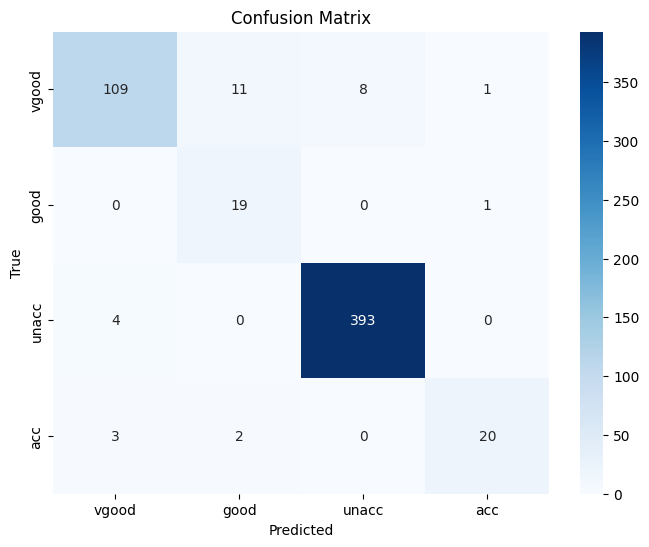

In [33]:
# <write your code here>
from sklearn.metrics import confusion_matrix

y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['vgood', 'good', 'unacc', 'acc'], yticklabels=['vgood', 'good', 'unacc', 'acc'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Task 2: Information Gain Approach

### 2.1: Create a decision tree classifier using the **information gain** approach and train your model on the training data

In [34]:
# <write your code here>
tree_entropy = DecisionTreeClassifier(criterion="entropy")

tree_entropy.fit(X_train,y_train)
y_pred = tree_entropy.predict(X_test)


### 2.2: Evaluate the model accuracy on the test data

In [35]:
# <write your code here>
acc2 = accuracy_score(y_test,y_pred)
print(f"Accuracy : {acc2:.2f}")

Accuracy : 0.94


### 2.3: Plot the tree obtained after training

In [37]:
# <write your code here>
export_graphviz(tree_entropy,out_file="tree.dot",class_names=['vgood', 'good', 'unacc', 'acc'],feature_names=feature_names, impurity=False, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
    graph = graphviz.Source(dot_graph)
    graph.render("tree")  
    graph.view()

### 2.4: Obtain the confusion matrix

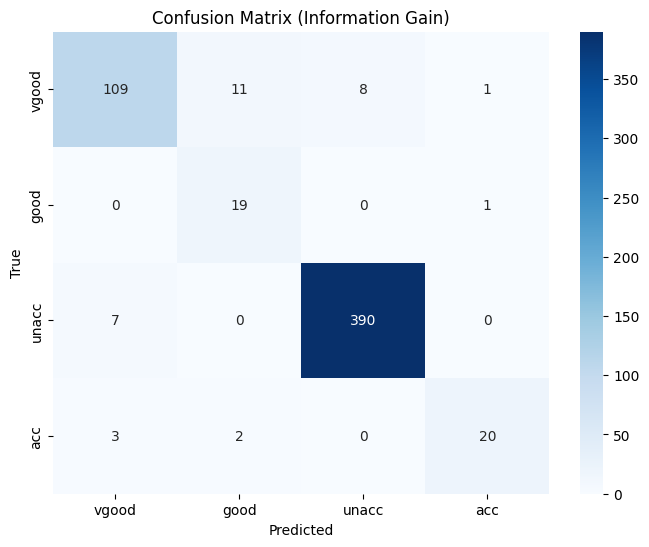

In [38]:
# <write your code here>
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['vgood', 'good', 'unacc', 'acc'], yticklabels=['vgood', 'good', 'unacc', 'acc'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Information Gain)')
plt.show()

### Task 3: Compare the obtained scores between the Gini Index and the Information Gain approach and conclude which one is best and why.

**write your answer here**

Gini Index seems to be slightly better in terms of accuracy in this case but the difference id very small (0.01)
so both accuracies are quite high
however if computational efficiency isa priority or the difference in accuracy continues to remain small, Gini index would be better choice